# Basic Numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [3]:
# 1. Simular lanzamiento de un dado equilibrado
# la librería clave es numpy
die_roll = np.random.randint(1,7)
die_roll

5

In [4]:
# 2. Simulo el lanzamiento de una moneda 10 veces
coin_flip = np.random.randint(0,2,10)
coin_flip

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [5]:
# 3. A partir de un lanzamiento, obtengo la frecuencia de caras (1)
def freq_flip(coin_flip):
    return sum(coin_flip)/len(coin_flip)

freq_flip(coin_flip)

0.9

In [6]:
# 4. Observo la frecuencia observada, pero para cada vez más lanzamientos

np.random.seed(0)
coin_flips = []
frequencies = []

for _ in range(1000):
    coin_flips.append(np.random.randint(0,2))
    frequencies.append(freq_flip(coin_flips))

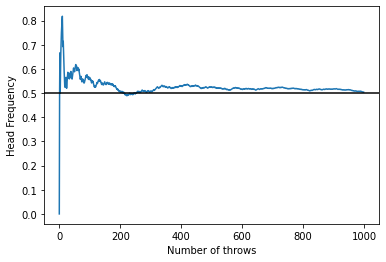

In [7]:
# 5. Grafico freciencias
plt.plot(list(range(1000)),frequencies)
plt.axhline(y=0.5, color = "k")
plt.xlabel('Number of throws')
plt.ylabel('Head Frequency')
plt.show()

# Impl. 1: simulación moneda cargada

In [12]:
# defino semilla
np.random.seed(0)

# defino: lanzo moneda 1 vez y me fijo el nro de exitos
coin_flip = np.random.binomial(1, 0.7)
print(coin_flip)

# defino: lanzo moneda 10 veces y me fijo el nro exitos
number_coin_flip = 10
np.random.binomial(number_coin_flip, 0.7)


1


6

# Intervalos de confianza

**Problema**: se lanza una moneda N veces y se computa la frecuencia relativa de los exitos de los lanzamientos. Que nos dice esa frecuencia de p, la probabilidad de obtener cara en 1 lanzamiento?

1. Si miramos cada lanzamiento como un problema de Bernoulli (p), lo que es exacto por construcción, la pregunta tiene relación con esta P.

2. Tirar muchas veces la moneda y observar la frecuencia relativa de exitos $\bar{x}$ es un problema tratado por el LGN, que habla de la tendencia en probabilidad de la media de variables aleatorias al valor esperado de esta al aumentar la cantidad valores considerados. En este caso la frecuencia de éxitos tiende al valor de probabilidad $p$. Esto responde la pregunta. 

**Problema 2**: sabemos que la frecuencia relativa tiende a $p$, pero eso depende en su certeza de la cantidad de lanzamientos. Se puede establecer la certeza para una cantidad dada N de lanzamientos ?

In [16]:
# si lanzo mil veces, puedo obtener una frecuencia relativa cercana a 0.7
coin_flips = 1000
p_secreto = 0.7
np.random.binomial(coin_flips,p_secreto)/coin_flips

0.702

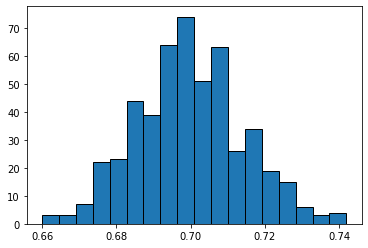

In [30]:
# podría realizar el ejercicio muchas veces y ver como se comporta esa frecuencia
nro_rep_exp = 500
resultados = np.random.binomial(coin_flips, p_secreto,nro_rep_exp)/coin_flips

# grafico resultados
plt.hist(resultados,bins='auto', edgecolor='black')
plt.show()

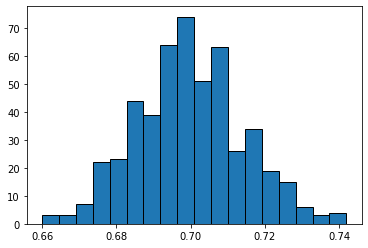

In [31]:
# miro bins y count de repeticiones

counts, bin_edges, _ = plt.hist(resultados,bins='auto', edgecolor='black')

In [32]:
counts

array([ 3.,  3.,  7., 22., 23., 44., 39., 64., 74., 51., 63., 26., 34.,
       19., 15.,  6.,  3.,  4.])

In [33]:
bin_edges

array([0.66      , 0.66455556, 0.66911111, 0.67366667, 0.67822222,
       0.68277778, 0.68733333, 0.69188889, 0.69644444, 0.701     ,
       0.70555556, 0.71011111, 0.71466667, 0.71922222, 0.72377778,
       0.72833333, 0.73288889, 0.73744444, 0.742     ])

In [40]:
# observo coverage

def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains "f"{count} element{'' if count == 1 else 's'}, equivalent to {round(count/nro_rep_exp*100,2)}% of data"))

for i in range(len(bin_edges)-1):
    output_bin_coverage(i)

The bin for frequency range 0.66 - 0.6645555555555556 contains 3 elements, equivalent to 0.6% of data
The bin for frequency range 0.6645555555555556 - 0.6691111111111111 contains 3 elements, equivalent to 0.6% of data
The bin for frequency range 0.6691111111111111 - 0.6736666666666666 contains 7 elements, equivalent to 1.4% of data
The bin for frequency range 0.6736666666666666 - 0.6782222222222223 contains 22 elements, equivalent to 4.4% of data
The bin for frequency range 0.6782222222222223 - 0.6827777777777778 contains 23 elements, equivalent to 4.6% of data
The bin for frequency range 0.6827777777777778 - 0.6873333333333334 contains 44 elements, equivalent to 8.8% of data
The bin for frequency range 0.6873333333333334 - 0.6918888888888889 contains 39 elements, equivalent to 7.8% of data
The bin for frequency range 0.6918888888888889 - 0.6964444444444444 contains 64 elements, equivalent to 12.8% of data
The bin for frequency range 0.6964444444444444 - 0.7010000000000001 contains 74 